## Results

In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

from modules.model import Net

d:\workspace\python\classification-playground\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
blobs, blobs_labels = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=202299)
moons, moons_labels = make_moons(n_samples=1000, noise=0.17, random_state=202299)

In [3]:
model_blobs = Net(2, 5, 0.04742) # kind sweep 34
model_blobs.load_state_dict(torch.load('weights/blobs/kind-sweep-34.pt'))

model_moons = Net(2, 1, 0.1246) # hopeful sweep 23
model_moons.load_state_dict(torch.load('weights/moons/hopeful-sweep-23.pt'))

<All keys matched successfully>

In [4]:
def decision_boundary(in_features, out_features, p, path, min_value, max_value):
    model = Net(in_features, out_features, p)
    model.load_state_dict(torch.load(path))

    h = 0.25

    x = np.arange(min_value, max_value, h)
    y = np.arange(min_value, max_value, h)

    X, Y = np.meshgrid(x, y)

    Z = np.zeros(X.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            features = torch.Tensor([X[i][j], Y[i][j]])
            output = model(features)

            if out_features == 1:
                Z[i][j] = 1 if output.item() >= 0.5 else 0
            else:
                Z[i,j] = output.max(0)[1].item()

    plt.contourf(X, Y, Z, cmap='rainbow', alpha=0.85)
    plt.colorbar()
    plt.show()

### Moons

[]

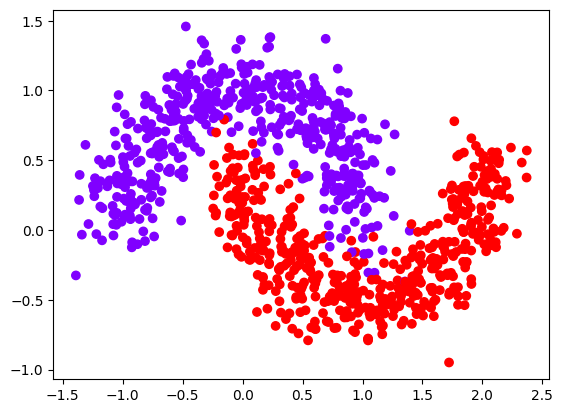

In [5]:
plt.scatter(moons[..., 0], moons[..., 1], c=moons_labels, cmap='rainbow')
plt.plot()

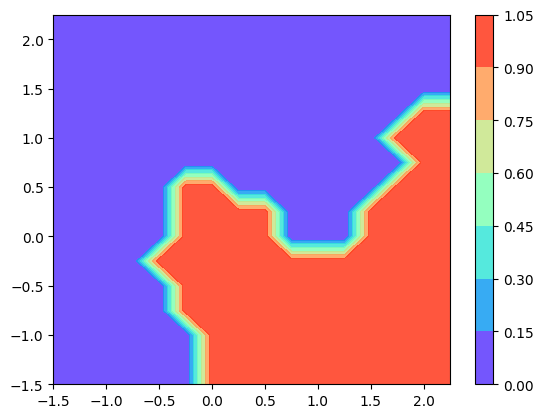

In [6]:
# moons
decision_boundary(2, 1, 0.1246, 'weights/moons/hopeful-sweep-23.pt', min_value=-1.5, max_value=2.5)

### Blobs

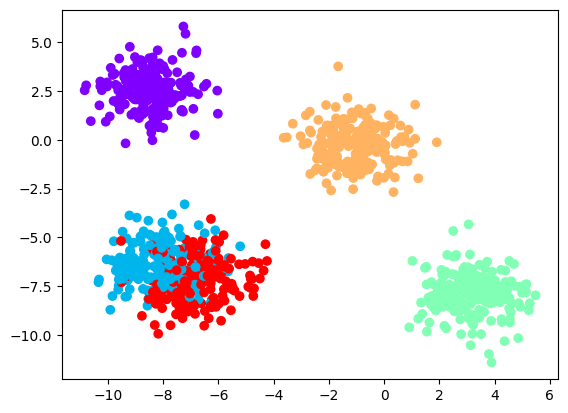

In [7]:
plt.scatter(blobs[..., 0], blobs[..., 1], c=blobs_labels, cmap='rainbow')
plt.show()

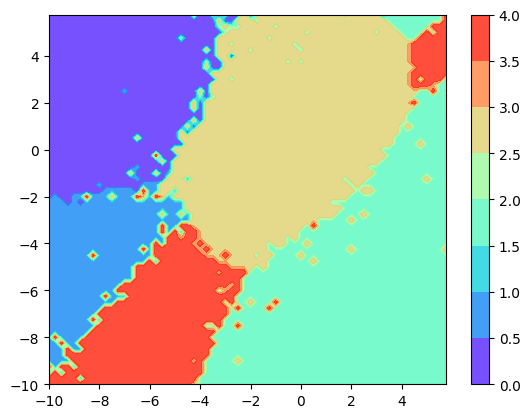

In [8]:
# blobs
decision_boundary(2, 5, 0.04742, 'weights/blobs/kind-sweep-34.pt', min_value=-10, max_value=6)